<a href="https://colab.research.google.com/github/dasdebojit/The-Sparks-Foundation-Internship-Tasks/blob/main/TSF_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP - The Sparks Foundation**
## **Task-3: Implementing Decision Tree Algorithm**
## By: Debojit Das

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Data Loading

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

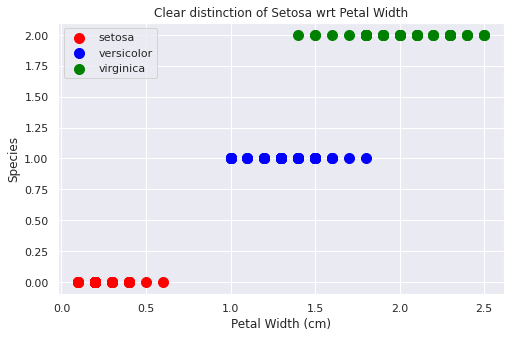

In [50]:
colors = ['red', 'blue', 'green']

plt.figure(figsize = (8, 5))
for i in range(3):
  plt.scatter(df.iloc[iris.target == i, 3], iris.target[iris.target == i], s = 100, c = colors[i], label = iris.target_names[i])
plt.xlabel('Petal Width (cm)')
plt.ylabel('Species')
plt.title('Clear distinction of Setosa wrt Petal Width')
plt.legend()

From the above graph, we can say that the Petal Width feature can be a prominant feature when it comes to prediction of Iris-Setosa species, hence this is expected to be one of the topmost decision node of the decision tree.

## Model Training (Desicion Tree)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)

In [36]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

## Decision Tree Visualization

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

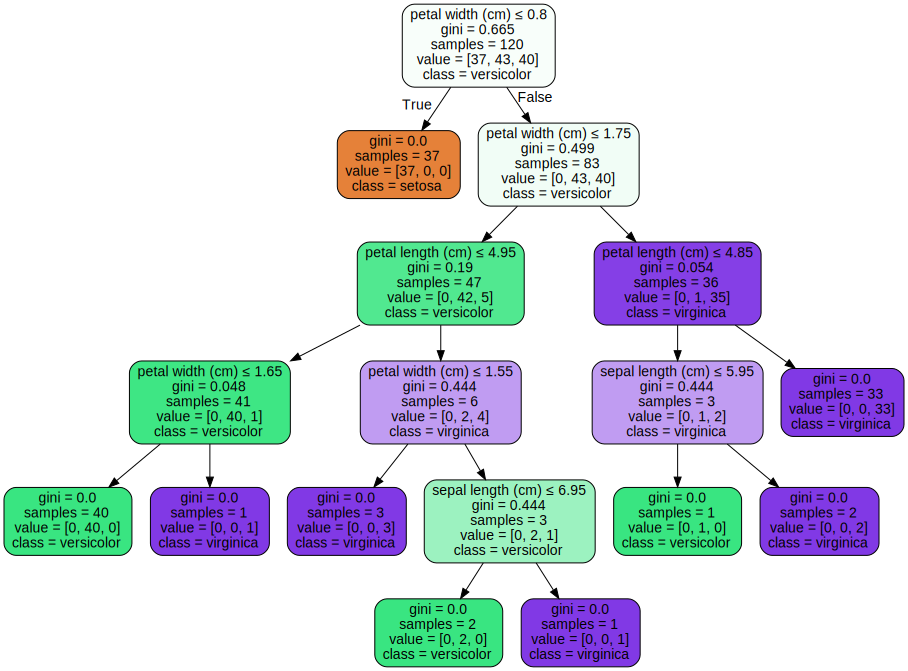

In [38]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Model Performance Evaluation

In [40]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 2, 2, 1, 2])

Text(0.5, 1.0, 'Confusion Matrix')

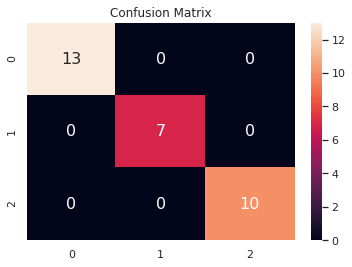

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, annot_kws={"size": 16})
ax.set_title('Confusion Matrix')

## Conclusion
Clearly, the model is 100% accurate as far as the current test set is considered. The Decision tree model proved to be a very good mapping function to estimate the species from the petals and sepals size parameters.